In [12]:
# Data Analysis
# Data Madness

#We will try to give an answer to 3. Is there a significant difference between people who have positive and negative attitude towards covid on masked speech understanding?

In [74]:
#first we get our packages
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from scipy.stats import norm


In [14]:
#we load the data
data = pd.read_csv('final/facemask.csv')
data.head()

,participant_private_id,participant_device_type,participant_browser,spreadsheet_name,spreadsheet_row,trial_number,rt,target,correct,answer,...,response_6_6,response_6_7,response_6_8,response_6_9,response_6_10,response_6_11,response_6_12,response_6_13,response_6_14,response_6_15
0,4373971,mobile,Mobile Safari 14.1.1,nm_1,46,3,469.0,S,True,S,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
1,4373971,mobile,Mobile Safari 14.1.1,nm_1,46,3,469.0,S,True,S,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
2,4373971,mobile,Mobile Safari 14.1.1,nm_1,43,4,717.0,S,True,S,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
3,4373971,mobile,Mobile Safari 14.1.1,nm_1,43,4,717.0,S,True,S,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little
4,4373971,mobile,Mobile Safari 14.1.1,nm_1,58,5,384.0,SH,False,TH,...,Neutral; no opinion,Disagree a little,Disagree a little,Agree a little,Disagree strongly,Disagree a little,Disagree a little,Neutral; no opinion,Neutral; no opinion,Disagree a little


In [47]:
#The data we need consists out of the amount of correct answers, and the average attitude, for this the first step is to 
#replace all corrects with 1 and all incorrects with zero to get an easy sum of all the correct answers
data['correct'].replace({False: 0, True: 1}, inplace=True)


In [55]:
#second we have to get to know a persons attitude towards covid, we can take this information from columns 33 - 39, grouped by the individuals
#Note: some columns from 33-39 are aimed at the pre-pandemic period, since this doesnt define the attitude, these columns are deleted
#The score can be calculated using /160 * 100, since every person did 160 tests.
data_needed = data.groupby("participant_private_id", as_index = False).agg({"mask_after":"first","mask_people":"first","mask_perception":"first","mask_spread":"first","mask_freedom":"first","mask_vulnerable":"first","correct":"sum"})
data_needed['correct'] = (data_needed['correct'] / 160) * 100
data_needed.head()

,participant_private_id,mask_after,mask_people,mask_perception,mask_spread,mask_freedom,mask_vulnerable,correct
0,4373599,7,5,5,7,1,7,91.25
1,4373639,6,3,4,6,6,6,81.25
2,4373827,7,3,5,7,1,7,81.25
3,4373971,5,4,4,3,5,4,88.75
4,4374140,7,7,5,7,1,7,76.25


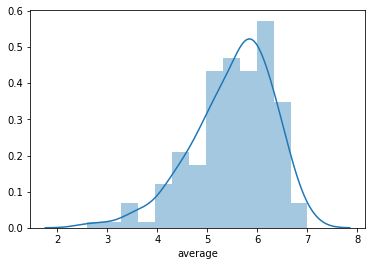

In [56]:
#if we compute the average of these 6 columns, a low number means negative attitude, a high number defines positive attitude.
data_needed['mask_freedom'] = 8 - data_attitude['mask_freedom']
cols = ['mask_after', 'mask_people', 'mask_perception', 'mask_spread', 'mask_freedom', 'mask_vulnerable']
data_needed['average'] = data_attitude.iloc[:, 1:6].mean(axis=1)
sns.distplot(data_needed['average'])

In [57]:
data_needed['average'].mean()

5.502352941176473

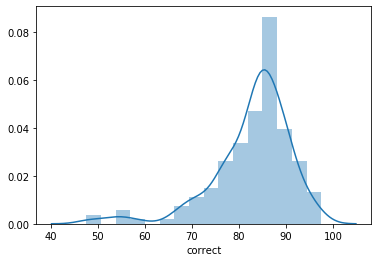

In [58]:
sns.distplot(data_needed['correct'])

In [64]:
#now that we have the data in the way that we want it, we can start with our hypothesis testing.
#Two sample hypothesis test, null hypothesis, there is no difference between the mean of people with a negative attitude and a positive attitude

mean = data_needed['correct'].mean()

82.69117647058823

In [90]:
#Now we take all the data of people with a negative attitude
negative_attitude = data_needed.loc[data_needed['average'] <= 5.5]
#and of all the people with a positive attitude
positive_attitude = data_needed.loc[data_needed['average'] >= 5.5]
from scipy.stats import ttest_ind
t, pval = ttest_ind(negative_attitude['correct'], positive_attitude['correct'])
print(t, pval)

0.31254492292067526 0.7550140407007598


In [ ]:
#as we can see, there is a very high p-value of 0.75, this means we cannot reject the null hypothesis and reject the alternative
#hypothesis. There is indeed no significant difference between people with a positive and negative attitude